# Price Predictor

In [20]:
import pandas as pd
import numpy as np

In [21]:
housing = pd.read_csv("data.csv")

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       498 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [24]:
# housing['CHAS'].value_counts()

In [25]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,498.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.287012,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703204,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.888250,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.209000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.623500,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# housing.hist(bins=50 , figsize = (20,15))
# plt.show()

# Train Test Splitting to avoid overfitting

In [27]:
# For implementation purpose only 
# def split_train_test(data , test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices] , data.iloc[test_indices]

In [28]:
# train_set , test_set = split_train_test(housing , 0.2)

In [29]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size = 0.2 , random_state = 42)
print(f"ROWS IN TRAIN SET : {len(train_set)}\nROWS IN TEST SET : {len(test_set)}\n")

ROWS IN TRAIN SET : 404
ROWS IN TEST SET : 101



In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 42)
for train_index , test_index in split.split(housing , housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [31]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 176 to 356
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     101 non-null    float64
 1   ZN       101 non-null    float64
 2   INDUS    101 non-null    float64
 3   CHAS     101 non-null    int64  
 4   NOX      101 non-null    float64
 5   RM       100 non-null    float64
 6   AGE      101 non-null    float64
 7   DIS      101 non-null    float64
 8   RAD      101 non-null    int64  
 9   TAX      101 non-null    int64  
 10  PTRATIO  101 non-null    float64
 11  B        101 non-null    float64
 12  LSTAT    101 non-null    float64
 13  MEDV     101 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.8 KB


In [32]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 215
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       398 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [33]:
housing = strat_train_set.copy()

# IDENTIFYING CORRELATIONS

In [34]:
corr_matrix = housing.corr()

In [35]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.657541
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

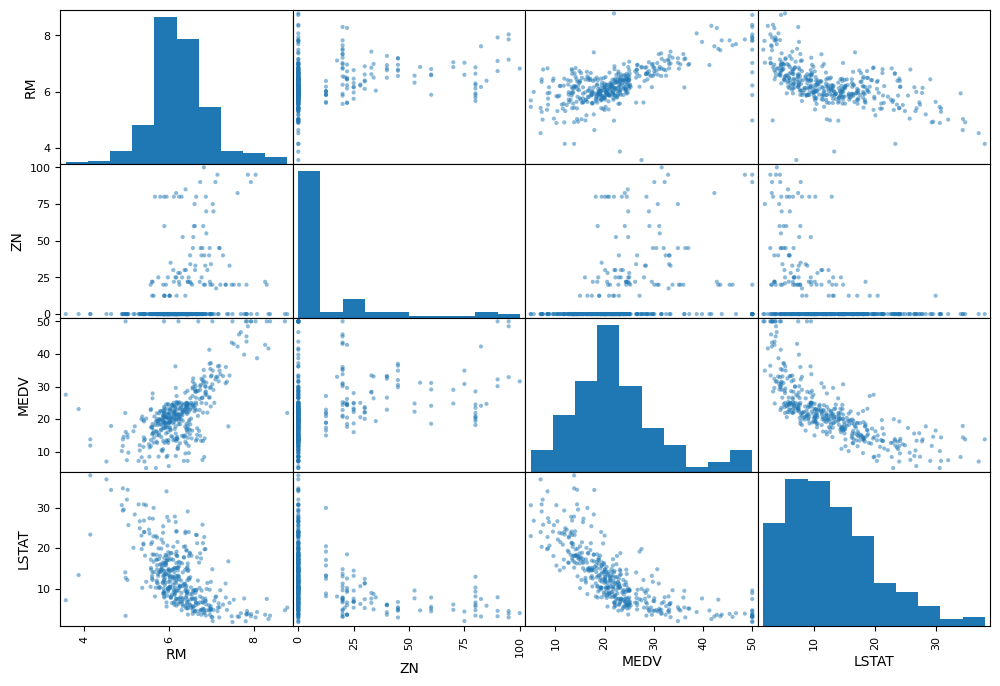

In [37]:
from pandas.plotting import scatter_matrix
attributes = ['RM' , 'ZN' , 'MEDV' , 'LSTAT']
scatter_matrix(housing[attributes] , figsize = (12,8))

In [38]:
# housing.plot(kind = "scatter" , x = "RM" , y = "MEDV", alpha = 0.8)

# SOME ATTRIBUTE COMBINATIONS


In [39]:
housing = strat_train_set.drop("MEDV" , axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

# Missing Attributes

In [40]:
# To take care of missing attriutes , we have 3 options 
#     1 : Get rid of missing data points
#     2 : Get rid of the whole attribute
#     3 : Set the value to some value(0,mean or median)

In [41]:
a = housing.dropna(subset = ["RM"]) # Option 1
a.shape

(398, 13)

In [42]:
a = housing.drop("RM" , axis = 1)
a.shape# Option 2
# Note that there is no RM column and also the original housing data frame will repeat unchanged

(404, 12)

In [43]:
median = housing["RM"].median() # Compute median for option 3
median

6.1835

In [44]:
housing["RM"].fillna(median)
# Note that original data frame wil remain unchanged

254    5.8760
348    6.9390
476    5.3040
321    6.0410
326    6.0830
        ...  
154    6.1520
423    5.5650
98     6.1835
455    5.9760
215    5.8880
Name: RM, Length: 404, dtype: float64

In [45]:
housing.shape
# Before we started filling attributes

(404, 13)

In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([2.9025e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.1835e+00, 7.7500e+01, 3.1675e+00, 5.0000e+00, 3.3600e+02,
       1.9050e+01, 3.9094e+02, 1.1570e+01])

In [48]:
x = imputer.transform(housing)

In [49]:
housing_tr = pd.DataFrame(x , columns = housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.252089,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.683533,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.877750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.183500,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.593500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit Learn Design

In [50]:
# # Primarily 3 types of ojects
#     1: Estimators : Estimates some parameters based on a dataset , eg- Imputer
#                     It has a fit() and transform()
#                     fit() - Fits the dataset and calculates internal parameters
                    
#     2 : Transformers : Takes input and returns output based on the learnings from fit().
#                        It also has a convenient function fit_transform() which fits and
#                        then transforms
                    
#     3 : Predictors : LinearRegression model is an example of predictor , fit() and predict()
#                      are 2 common function . It also gives score function which will evaluate
#                      predictions

# Feature Scaling

In [51]:
# Primarily there are 2 types of feature scaling methods
#     1 : Min - Max Scaling (Normalization)
#         (value - min) / (max-min)
#         Sklearn provides class called MinMaxScaler for this
        
#     2 : Standardization
#         (value - mean) / standard deviation
#         Sklearn provides class called StandardScaler for this

# Creating a Pipeline

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer' , SimpleImputer(strategy = "median")) , ("std_scaler" , StandardScaler())])

In [53]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [54]:
housing_num_tr.shape

(404, 13)

# Selecting a desired model for Singhania Real Estates

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr , housing_labels)

RandomForestRegressor()

In [92]:
some_labels = housing_labels.iloc[:5]
some_data = housing.iloc[:5]

In [93]:
prepared_data = my_pipeline.transform(some_data)

In [94]:
model.predict(prepared_data)

array([20.437, 27.364, 12.525, 21.065, 21.955])

In [95]:
list(some_labels)

[20.9, 26.6, 12.0, 20.4, 22.2]

# Evaluating the model

In [96]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels , housing_predictions)
rmse = np.sqrt(mse)

In [97]:
rmse

1.2749173745310673

# Using better evaluation techniques - Cross Validation

In [98]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model , housing_num_tr , housing_labels , scoring = "neg_mean_squared_error" , cv = 10)
rmse_scores = np.sqrt(-scores)

In [99]:
rmse_scores

array([3.3220819 , 2.62500659, 5.12089172, 2.92907807, 2.72094426,
       2.51806682, 2.90461756, 2.96862035, 2.12323783, 4.85454888])

# def print_scores(scores):
    print("Scores are ", scores)
    print("Mean " , scores.mean())
    print("Standard Deviation " , scores.std())

In [102]:
print_scores(rmse_scores)

Scores are  [3.3220819  2.62500659 5.12089172 2.92907807 2.72094426 2.51806682
 2.90461756 2.96862035 2.12323783 4.85454888]
Mean  3.208709398427812
Standard Deviation  0.9402260320040595


# Saving the Model

In [104]:
from joblib import dump , load
dump(model , 'Singhania.jolib')

['Singhania.jolib']

# Testing the model

In [107]:
x_test = strat_test_set.drop("MEDV" , axis = 1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mean_squared_error = mean_squared_error(y_test , final_predictions)
final_mse = mean_squared_error(y_test , final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions ,list(y_test))

[24.755 23.256 47.401 33.399 45.222 35.022 20.911 23.798 33.271 19.926
 18.845 31.025 21.81  33.337 20.13  23.401 12.911 20.947 28.024 19.804
 20.303 46.044 13.03  18.893 25.42  34.367 16.364 15.62   6.592 20.258
 23.555 23.042 17.44  15.172 20.857 18.231 22.364 16.957 45.089 18.253
 21.33  18.7   19.587 18.73  32.911  8.161 24.768 15.041 20.877 21.59
 46.046 25.148 14.87  21.826 19.614 47.604 33.224 19.939 34.812 11.522
 24.023 34.828 33.163 23.971 14.246 21.039 20.601 16.353 28.189 25.08
 22.996 32.162 19.392 32.827 10.536 20.152 42.748 19.88  19.79  14.754
 41.113  9.292 35.724 22.848 29.681 15.849 23.348 21.823 20.281 15.965
 26.108 10.917 33.236 12.982 25.862 19.631 33.466 13.557 21.346 21.275
 20.302] [24.6, 22.0, 44.8, 23.6, 48.8, 36.5, 19.7, 23.1, 34.6, 21.5, 23.1, 15.0, 23.0, 34.9, 18.5, 10.4, 10.2, 18.9, 23.9, 19.3, 19.4, 48.3, 10.9, 19.6, 27.5, 37.3, 16.1, 15.2, 10.5, 21.4, 23.2, 20.7, 21.7, 13.0, 22.3, 19.6, 21.2, 18.1, 50.0, 23.7, 22.6, 20.5, 18.9, 19.5, 32.7, 8.8, 29.1, 1

In [108]:
final_rmse

3.5431323111418553